# Pandasの基本

##参考サイト：

* [【Pythonプログラミング】Pandasの基本 〜表形式データ・データ分析〜 初心者向けのDataFrameの操作入門！](https://www.youtube.com/watch?v=HYWQbAdsG6s)
* [【Pythonプログラミング】Pandasの基本 (後編) 〜 表形式データ・データ分析 〜 初心者向けのDataFrameの操作入門！](https://www.youtube.com/watch?v=lMt72Gggph4&t=0s)




# 表形式のデータ
表形式のデータを扱う場合にはPandasが便利

たとえばこういうもの

| 名前 | 年齢 | 身長 | 体重 |
|--------|-------|---------|--------|
| John |  20 | 180  | 90   |
| Mike |  18 |  170 | 70 |
| Hana | 16 |  160  | 55 |
| Momo | 15 | 150 | 50 |

ExcelやCSV形式（カンマ区切りデータ）

## DataFrame
表形式データのクラス、オブジェクト

## Series
１次元データのクラス、オブジェクト


## Index
行の名前のこと。Rでいうとlabel。labelなので同じ名前があってもいいし、後から書き換えられる。

## DataFrameの作成と読み込み

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({
    '名前':['佐藤','木村','山田'],
    '年齢':[21,30,18],
    '住所':['東京','岐阜','埼玉'],
    '血液型':['A', 'O', 'B']

})

display(df)

,名前,年齢,住所,血液型
0,佐藤,21,東京,A
1,木村,30,岐阜,O
2,山田,18,埼玉,B


Excel ファイルを読み込む場合は、pd.read_excel()を用いる

In [4]:
df = pd.read_excel('./User_data.xlsx',index_col='ユーザーID',sheet_name='2月')
display(df)

,名前,年齢,性別,身長,体重
ユーザーID,,,,,
User001,John,63,M,191.62,64.61
User002,Tom,53,F,160.62,68.32
User003,Emily,39,M,159.09,72.80
User004,Sarah,32,M,159.17,89.26
User005,Michael,45,M,165.21,59.98
User006,Robert,63,F,176.24,75.71
User007,Jessica,43,M,171.60,79.62
User008,Laura,47,F,164.56,52.32
User009,David,35,M,180.59,80.38



## データの抽出
DataFrameの一部だけを取り出す場合には


*  loc
*  iloc

などを使う。


In [5]:
df.loc[:, ['名前','年齢']]    #locでは行、列の名前のリストで指定する

,名前,年齢
ユーザーID,,
User001,John,63
User002,Tom,53
User003,Emily,39
User004,Sarah,32
User005,Michael,45
User006,Robert,63
User007,Jessica,43
User008,Laura,47
User009,David,35


In [6]:
df.iloc[1:4,0:3] # ilocでは位置の番号で指定する

,名前,年齢,性別
ユーザーID,,,
User002,Tom,53,F
User003,Emily,39,M
User004,Sarah,32,M


## 条件を指定した抽出
・ブールインデックス　（True, Falseで表したSeries）で指定できる

In [ ]:
# ブールインデックスの例

df['年齢'] > 50 # 年齢が50歳以上であるか

ユーザーID
User001     True
User002     True
User003    False
User004    False
User005    False
User006     True
User007    False
User008    False
User009    False
User010    False
Name: 年齢, dtype: bool

In [ ]:
# 条件に合うものを抽出する場合には、ブールインデックスを添字で与える
df[(df['年齢'] > 50 ) & (df['身長']  < 180)]

,名前,年齢,性別,身長,体重
ユーザーID,,,,,
User002,Tom,53,F,160.62,68.32
User006,Robert,63,F,176.24,75.71


## DataFrameから統計量を調べる

*   df.mean() ←　平均値
*   df.max() ←　最大値
*   df.min() ←　最小値
*   df.sum() ←　合計
*   df.std()
*   df.var()
*   df.median()




In [ ]:
df.mean(numeric_only=True)

年齢     45.500
身長    168.567
体重     70.153
dtype: float64

In [ ]:
df['年齢'].min()

32

## GroupByによる集計
GroupByでまとめることで、要素ごとの集計を作ることができる。
例えば、次のような売上データを、担当者ごとに集計したいとする。

In [ ]:
sales = pd.read_csv("./dummy_sales.csv")
display(sales)

,Date,Name,Sales
0,2022-04-13,Ken,296779
1,2022-12-15,Ken,194262
2,2022-09-28,Ken,275117
3,2022-04-17,Mike,173776
4,2022-03-13,Mike,278376
...,...,...,...
95,2022-12-11,John,270885
96,2022-11-23,Mike,276071
97,2022-01-09,Ken,209040
98,2022-12-10,John,162183


この場合は、GroupByを用いて、担当者ごとの平均を計算する

In [ ]:
sales.groupby('Name').mean(numeric_only=True)

,Sales
Name,
John,221244.631579
Ken,234597.000000
Mike,236799.676471
Tom,225756.181818


## インデックスの変更

pandasのインデックス　→　行ラベルのようなもの　\
後から変更可能。

In [ ]:
df = pd.read_excel('./User_data.xlsx',index_col='ユーザーID',sheet_name='2月')
display(df)

,名前,年齢,性別,身長,体重
ユーザーID,,,,,
User001,John,63,M,191.62,64.61
User002,Tom,53,F,160.62,68.32
User003,Emily,39,M,159.09,72.80
User004,Sarah,32,M,159.17,89.26
User005,Michael,45,M,165.21,59.98
User006,Robert,63,F,176.24,75.71
User007,Jessica,43,M,171.60,79.62
User008,Laura,47,F,164.56,52.32
User009,David,35,M,180.59,80.38


このときのインデックスはユーザーID

インデックスを0から振り直すときには、reset_index()を使う。 \
何も指定せずにreset_index()を使うと、元々のインデックスが列として読み込まれる。 \
列にしたくないときはdrop=Trueを引数で指定。

In [ ]:
# 特に指定しなければ、元々のインデックスは列として読み込まれる
df.reset_index()


,ユーザーID,名前,年齢,性別,身長,体重
0,User001,John,63,M,191.62,64.61
1,User002,Tom,53,F,160.62,68.32
2,User003,Emily,39,M,159.09,72.80
3,User004,Sarah,32,M,159.17,89.26
4,User005,Michael,45,M,165.21,59.98
5,User006,Robert,63,F,176.24,75.71
6,User007,Jessica,43,M,171.60,79.62
7,User008,Laura,47,F,164.56,52.32
8,User009,David,35,M,180.59,80.38
9,User010,Emma,35,M,156.97,58.53


In [ ]:
# 列として読み込みたくないときはdrop = True
df.reset_index(drop=True)

,名前,年齢,性別,身長,体重
0,John,63,M,191.62,64.61
1,Tom,53,F,160.62,68.32
2,Emily,39,M,159.09,72.80
3,Sarah,32,M,159.17,89.26
4,Michael,45,M,165.21,59.98
5,Robert,63,F,176.24,75.71
6,Jessica,43,M,171.60,79.62
7,Laura,47,F,164.56,52.32
8,David,35,M,180.59,80.38
9,Emma,35,M,156.97,58.53


In [1]:
# 基本的には元のDataFrameは変更されないので、新しい変数に代入する。
df_new = df.reset_index()
display(df_new)

NameError: name 'df' is not defined

インデックスには好きな列を割り当てたり、新たな列を割り当てることもできる

In [ ]:
df_new.index = [str(x).zfill(3) for x in range(1,11)] #ゼロ詰めにする
display(df_new)

,ユーザーID,名前,年齢,性別,身長,体重
001,User001,John,63,M,191.62,64.61
002,User002,Tom,53,F,160.62,68.32
003,User003,Emily,39,M,159.09,72.80
004,User004,Sarah,32,M,159.17,89.26
005,User005,Michael,45,M,165.21,59.98
006,User006,Robert,63,F,176.24,75.71
007,User007,Jessica,43,M,171.60,79.62
008,User008,Laura,47,F,164.56,52.32
009,User009,David,35,M,180.59,80.38
010,User010,Emma,35,M,156.97,58.53


In [ ]:
# DataFrame自体を変更したい場合はinplace=Trueを使う（破壊的な変更）
df_new.set_index('名前', inplace=True)
display(df_new)

,ユーザーID,年齢,性別,身長,体重
名前,,,,,
John,User001,63,M,191.62,64.61
Tom,User002,53,F,160.62,68.32
Emily,User003,39,M,159.09,72.80
Sarah,User004,32,M,159.17,89.26
Michael,User005,45,M,165.21,59.98
Robert,User006,63,F,176.24,75.71
Jessica,User007,43,M,171.60,79.62
Laura,User008,47,F,164.56,52.32
David,User009,35,M,180.59,80.38


もちろん列名も変更できる

In [ ]:
df_new.columns = ['User_ID','Age','Sex','Height','Weight']
display(df_new)

,User_ID,Age,Sex,Height,Weight
名前,,,,,
John,User001,63,M,191.62,64.61
Tom,User002,53,F,160.62,68.32
Emily,User003,39,M,159.09,72.80
Sarah,User004,32,M,159.17,89.26
Michael,User005,45,M,165.21,59.98
Robert,User006,63,F,176.24,75.71
Jessica,User007,43,M,171.60,79.62
Laura,User008,47,F,164.56,52.32
David,User009,35,M,180.59,80.38


# DataFrameの結合


* Concat
*   Marge



Concatでリストを縦につなぐ

In [ ]:
df_1 = pd.DataFrame({
    '名前':['佐藤','斎藤','鈴木'],
    '年齢':[21,30,18],
    '住所':['東京都','岐阜県','埼玉県']
})

df_2 = pd.DataFrame({
    '名前':['秋山','橋本'],
    '年齢':[19,51],
    '住所':['大阪府','千葉県']
})

df_con = pd.concat([df_1,df_2])
display(df_con)

,名前,年齢,住所
0,佐藤,21,東京都
1,斎藤,30,岐阜県
2,鈴木,18,埼玉県
0,秋山,19,大阪府
1,橋本,51,千葉県


Concatを使ってリストを横につなぐ

In [ ]:
df_3 = pd.DataFrame({
    'レベル':['A','C','SS'],
    '誕生日':['2月10日','6月23日','10月5日']
})

# Indexごとに結合される
df_con2 = pd.concat([df_1,df_3],axis=1)
display(df_con2)

,名前,年齢,住所,レベル,誕生日
0,佐藤,21,東京都,A,2月１０日
1,斎藤,30,岐阜県,C,6月２３日
2,鈴木,18,埼玉県,SS,10月５日


In [ ]:
#　足りない行がある場合は、その行の値はNaN（欠損値）になる

pd.concat([df_1,df_2],axis=1)

,名前,年齢,住所,名前,年齢,住所
0,佐藤,21,東京都,秋山,19.0,大阪府
1,斎藤,30,岐阜県,橋本,51.0,千葉県
2,鈴木,18,埼玉県,NaN,NaN,NaN


## marge

Margeは２つのDataFrameを横に結合する \
結合するときに、キーを定めて、そのキーを使って結合する点が異なる

In [ ]:
df_A = pd.DataFrame({
    'id':['001','002','005'],
    '年齢':[15,22,35],
     '住所':['東京都','岐阜県','埼玉県']
})

df_B = pd.DataFrame({
    'id':['001','002','004','006'],
     '購入金額':[15000,50000,23000,40000]
})

display(df_A, df_B)

,id,年齢,住所
0,001,15,東京都
1,002,22,岐阜県
2,005,35,埼玉県


,id,購入金額
0,001,15000
1,002,50000
2,004,23000
3,006,40000


何も指定しない場合、Margeでは内部結合（inner join)が実行される。 \
つまり、df_A と df_Bの両方に含まれる行だけが残る。

In [ ]:
# inner join
pd.merge(df_A, df_B, on='id')

,id,年齢,住所,購入金額
0,001,15,東京都,15000
1,002,22,岐阜県,50000


この他の結合方法に

*   左外部結合（left join) → 左側のデータフレームをすべて残し、右側のデータフレームにだけあるものを破棄する
*   完全外部結合(outer join) →　すべてのデータフレームを結合する

というものもあり、必要に応じて使い分ける。




In [ ]:
# left join
pd.merge(df_A, df_B, on='id', how = 'left')

,id,年齢,住所,購入金額
0,001,15,東京都,15000.0
1,002,22,岐阜県,50000.0
2,005,35,埼玉県,NaN


In [ ]:
# outer join
pd.merge(df_A, df_B, on='id', how = 'outer')

,id,年齢,住所,購入金額
0,001,15.0,東京都,15000.0
1,002,22.0,岐阜県,50000.0
2,005,35.0,埼玉県,NaN
3,004,NaN,NaN,23000.0
4,006,NaN,NaN,40000.0


## グラフ描画
DataFrameからグラフを描画する場合にはこのように書く

,User_ID,Age,Sex,Height,Weight
名前,,,,,
John,User001,63,M,191.62,64.61
Tom,User002,53,F,160.62,68.32
Emily,User003,39,M,159.09,72.80
Sarah,User004,32,M,159.17,89.26
Michael,User005,45,M,165.21,59.98
Robert,User006,63,F,176.24,75.71
Jessica,User007,43,M,171.60,79.62
Laura,User008,47,F,164.56,52.32
David,User009,35,M,180.59,80.38


<Axes: xlabel='Age'>

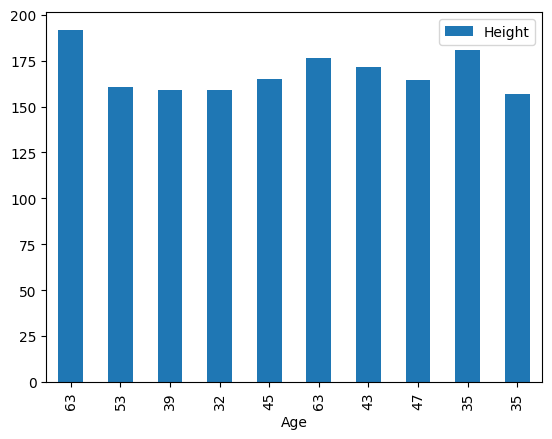

In [ ]:
import pandas as pd
import matplotlib

display(df_new)

df_new.plot(x='Age',y='Height',kind='bar')